In [6]:
import pandas as pd
df = pd.read_excel('US Superstore data.xls')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


###**Exercise 1 Data Preparation: **
Perform basic data cleaning and preprocessing.

In [3]:
print(df.isnull().sum())
print(df.drop_duplicates())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64
      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
0          1  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
1          2  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
2          3  CA-2016-138688 2016-06-12 2016-06-16    Second Class   
3          4  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
4          5  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
...      ...             ...        ...        ...             ...   
9989    9990  CA-2014-110422 2014-01-21 2014-01-23    Second Class   
9990    9991  CA-2017-121258

In [4]:
print(df.dtypes)

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object


###**Exercise 2 Data Visualization**
Create an interactive line chart to show sales trends over the years.

Build an interactive map to visualize sales distribution by country.

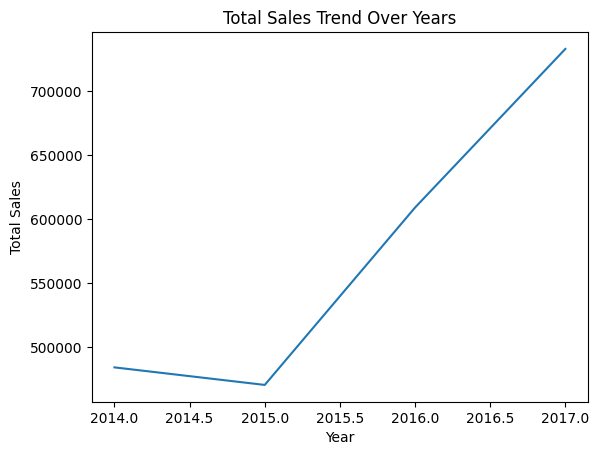

In [4]:
import matplotlib.pyplot as plt

df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Year'] = df['Order Date'].dt.year
sales_by_year = df.groupby('Year')['Sales'].sum()

x = sales_by_year.index
y = sales_by_year.values

plt.plot(x, y)
plt.xlabel('Year') # Add x-axis label for clarity
plt.ylabel('Total Sales') # Add y-axis label for clarity
plt.title('Total Sales Trend Over Years')
plt.show()

In [7]:
import pandas as pd
import plotly.express as px


# Mapping full state names to their abbreviations
state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH',
    'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA',
    'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN',
    'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Group sales by state
state_sales = df.groupby('State')['Sales'].sum().reset_index()

# Add abbreviation column
state_sales['State Code'] = state_sales['State'].map(state_abbrev)

# Plot using Plotly
fig = px.choropleth(
    state_sales,
    locations='State Code',
    locationmode='USA-states',
    color='Sales',
    scope='usa',
    color_continuous_scale='Blues',
    title='Sales Distribution by State'
)

fig.show()

###**3. Data Visualization with Seaborn:**

Use Seaborn to generate a bar chart showing top 10 products by sales.

Create a scatter plot to analyze the relationship between profit and discount.

<ipython-input-15-ef59d85c6049>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




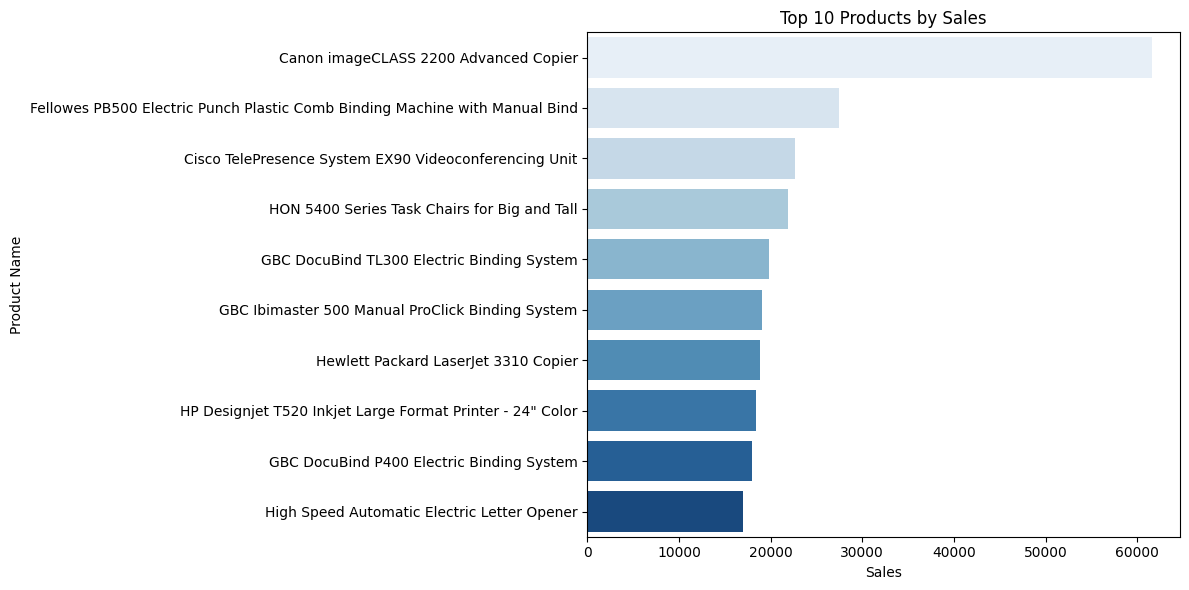

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

top_10_products = df.groupby('Product Name')['Sales'].sum().nlargest(10)

top_10_df = top_10_products.reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Sales', y='Product Name', data=top_10_df, palette='Blues')
plt.title('Top 10 Products by Sales')
plt.xlabel('Sales')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

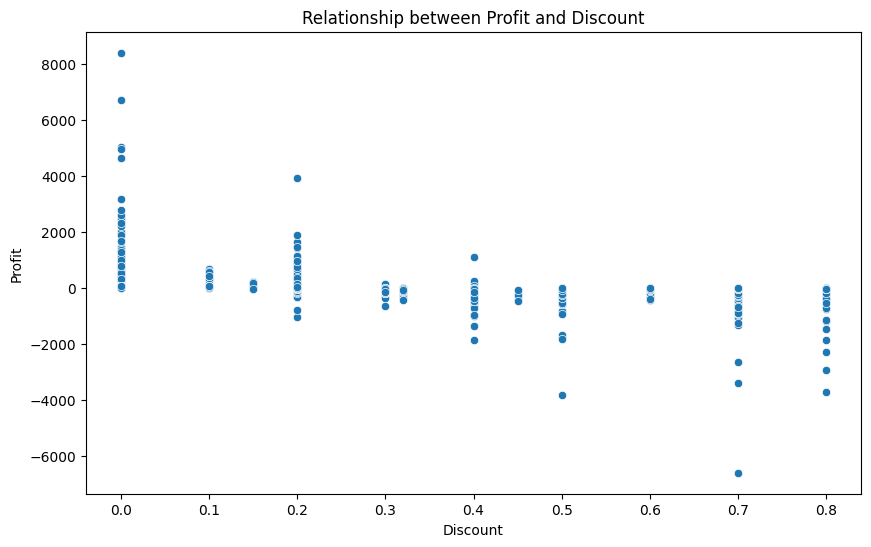

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title('Relationship between Profit and Discount')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

Answer: As can be seen above from the scatterplot, there is a clear negative relationship between discount and profit. The higher the discount, the less profit there is.

###**4. Comparative Analysis:**
Compare the insights gained from Matplotlib and Seaborn visualizations.
Document your observations about the ease of use and effectiveness of both tools.

**answer: **

When it comes to visualizing data in Python, Matplotlib is often the first tool that comes to mind. It is a powerful and flexible library for creating basic plots and customizing every aspect of the visualization. However, it often requires more lines of code to achieve a polished result.

On the other hand, Seaborn is built on top of Matplotlib and provides a higher-level interface for creating attractive and informative statistical graphics. If I need more visually appealing or complex plots (like heatmaps, or pair plots), Seaborn is the tool of choice.

During this exercise, I found that:
	•	Seaborn is easier and cleaner to use, especially for tasks like creating scatter plots or bar plots with built-in aesthetics.
	•	Seaborn automatically integrates with pandas DataFrames, making it very convenient.
	•	Seaborn often works alongside Matplotlib, especially when adding titles, axis labels, or customizing figure size. For example, the scatter plot created above with Seaborn had much cleaner code compared to doing the same in Matplotlib.

